In [1]:
import requests
from bs4 import BeautifulSoup
import re
import collections, heapq
from urllib.parse import urlparse, urljoin
import time
import pickle

## CS6200 HW3 Part2: Link Statistics
a. Number of unique links extracted

b. Frequency distribution by domain

c. Breakdown of links by type (e.g., text, image, video)

d. Average link depth

e. For each crawled page, compute the number of incoming and outgoing links. Report the
top-25 pages with the highest number of incoming and outgoing links.

f. Plot the top-50 domains ranked by highest number of incoming links. Note that this is a
computation for domains (e.g., cnn.com, bbc.co.uk) and not individual pages.

In [15]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [8]:
# read extracted links from file
f = open("link_dict_2k.pickle","rb")
link_dict = pickle.load(f)
f.close()

### a. Number of unique links extracted:


In [72]:
# Number of unique links extracted
len(link_dict)

6605

### b. Frequency distribution by domain

In [79]:
def getDomain(url):
    res = urlparse(url)
    return res.netloc

def getDomainDict(link_dict):
    """
    Obtain a domain_dict from link_dict
    domain_dict structure:
        key = domain
        val = {"count": int,
            "incoming": int
            }
    """

    domain_dict = {}
    for link in link_dict:
        domain = getDomain(link)
        if domain in domain_dict:
            domain_dict[domain]["count"]+=1
            domain_dict[domain]["incoming"] += link_dict[link]["incoming"]
        else:
            domain_dict[domain] = {
                "count": 1, 
                "incoming": link_dict[link]["incoming"]
                }
    return domain_dict


In [80]:
domain_dict = getDomainDict(link_dict)

Text(0, 0.5, 'Number of domains')

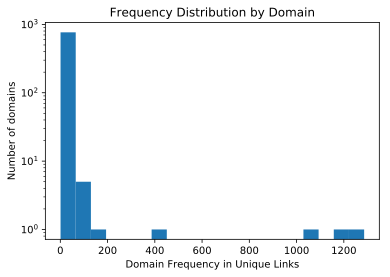

In [83]:
domain_counts = [domain_dict[d]["count"] for d in domain_dict]
plt.hist(domain_counts, bins=20)
plt.yscale('log')
plt.title("Frequency Distribution by Domain")
plt.xlabel("Domain Frequency in Unique Links")
plt.ylabel("Number of domains")

### c. Breakdown of links by type (e.g., text, image, video)

In [13]:
# read extracted links from file
f = open("link_dict_2k.pickle","rb")
link_dict = pickle.load(f)
f.close()

In [22]:
types = [link_dict[l].get("type", "n/a") for l in link_dict]

In [23]:
type_counts = collections.Counter(types)
type_counts

Counter({'text/html': 825,
         'video': 2,
         'audio': 3,
         'image': 11,
         None: 5,
         'document': 28})

In [25]:
for l in link_dict:
    t = link_dict[l].get("type", "n/a")
    if  t!= "text/html":
        print(t, l, sep="\t")

video	https://upload.wikimedia.org/wikipedia/commons/b/be/Announcement_Nobelprize_Literature_2009-1.ogv
audio	https://en.wikipedia.org/wiki/File:Sv-Alfred_Nobel.ogg
image	https://en.wikipedia.org/wiki/File:R%C3%B6ntgen,_Wilhelm_Conrad_(1845-1923).jpg
audio	https://en.wikipedia.org/wiki/File:Nobel_Prize_by_Dimitri_O_Ledenyov_and_Viktor_O_Ledenyov.ogg
image	https://en.wikipedia.org/wiki/File:Nobelinstituttet_20080913-01.jpg
image	https://en.wikipedia.org/wiki/File:Nobel_Prize.png
image	https://en.wikipedia.org/wiki/File:Giovanni_Jona-Lasinio-Nobel_Lecture-2.jpg
image	https://en.wikipedia.org/wiki/File:Alfred_Nobels_will-November_25th,_1895.jpg
None	https://en.wikipedia.org/wiki/Ralph_M._Steinman
None	https://en.wikipedia.org/wiki/File:Worldmapnobellaureatesbycountry2.PNG
audio	https://upload.wikimedia.org/wikipedia/commons/0/00/Sv-Alfred_Nobel.ogg
image	https://en.wikipedia.org/wiki/File:Horbjorn_Jagland_presents_President_Barack_Obama_with_the_Nobel_Prize_medal_and_diploma.jpg
video	htt

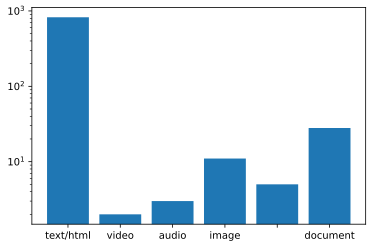

In [44]:
types = list(type_counts.keys())
plt.bar(range(len(types)), list(type_counts.values()), tick_label=types)
plt.yscale('log')


### d. Average link depth

In [51]:
link_depths = [link_dict[l]["depth"] for l in link_dict]
avg_link_depth = sum(link_depths)/len(link_depths)

print("Average link depth = {:.3f}".format(avg_link_depth))

Average link depth = 1.994


Text(0, 0.5, 'Number of Links')

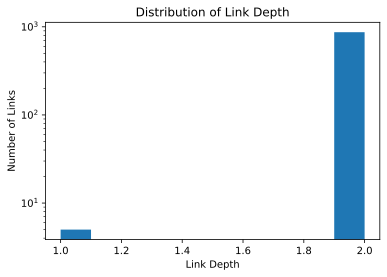

In [52]:
plt.hist(link_depths)
plt.yscale('log')
plt.title("Distribution of Link Depth")
plt.xlabel("Link Depth")
plt.ylabel("Number of Links")

Text(0, 0.5, 'Number of Links')

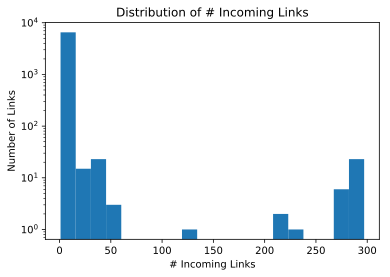

In [90]:
link_incomings = [link_dict[l]["incoming"] for l in link_dict]
plt.hist(link_incomings, bins=20)
plt.yscale('log')
plt.title("Distribution of # Incoming Links")
plt.xlabel("# Incoming Links")
plt.ylabel("Number of Links")

### e. Top-25 Pages with highest number of incoming & outgoing links

Text(0, 0.5, 'Number of Links')

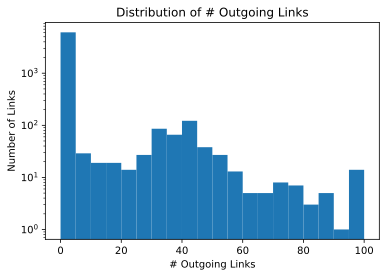

In [89]:
link_outgoings = [link_dict[l]["outgoing"] for l in link_dict]
plt.hist(link_outgoings, bins=20)
plt.yscale('log')
plt.title("Distribution of # Outgoing Links")
plt.xlabel("# Outgoing Links")
plt.ylabel("Number of Links")

In [91]:
# array item: [link:str, {"incoming":int, "outgoing":int, "depth":int}]
link_array = [[l, link_dict[l]] for l in link_dict]

In [92]:
link_array.sort(key=lambda x:x[1]["incoming"], reverse=True)

In [99]:
# Top25 links with highest #incomings
print("Rank  | Link Url	                          |  #Incomings")
print("---------------------------------------------------------------------------")

for i in range(25):
    link = link_array[i]
    print(i+1, link[0], link[1]["incoming"], sep='\t')


######## Top25 links with highest #incomings #################
Rank  | Link Url	                          |  #Incomings
---------------------------------------------------------------------------
1	https://www.facebook.com/nobelprize/	297
2	https://www.nobelprize.org	288
3	https://www.nobelprize.org/nomination/archive/	288
4	https://www.nobelprize.org/nobel-prize-concert/	288
5	https://www.nobelprize.org/in-depth/	287
6	https://www.nobelprize.org/nobel-prize-dialogue/	287
7	https://www.nobelprize.org/nomination/nomination-and-selection-of-chemistry-laureates/	287
8	https://www.nobelprize.org/education-network-nobel-prize-teacher-summit/	287
9	https://www.nobelprize.org/press-room/	287
10	https://www.nobelprize.org/nomination/nomination-and-selection-of-physics-laureates/	287
11	https://www.nobelprize.org/alfred-nobel/biographical-information/	287
12	https://www.nobelprize.org/nobel-prize-inspiration-initiative/	287
13	https://www.nobelprize.org/prizes/facts/nobel-prize-facts/	287
14	ht

In [101]:
# Top25 links with highest #outgoings
link_array.sort(key=lambda x:x[1]["outgoing"], reverse=True)

print("Rank  | Link Url	                          |  #Outgoings")
print("---------------------------------------------------------------------------")

for i in range(25):
    link = link_array[i]
    print(i+1, link[0], link[1]["outgoing"], sep='\t')


Rank  | Link Url	                          |  #Outgoings
---------------------------------------------------------------------------
1	https://www.nobelprize.org	100
2	https://www.britannica.com/science/physics-science	100
3	https://www.nobelprize.org/prizes/lists/all-nobel-laureates-in-physiology-or-medicine/	100
4	https://en.wikipedia.org/wiki/Nobel_Prize	100
5	http://nobelprize.org/nobel_prizes/literature/laureates/	100
6	http://nobelprize.org/nobel_prizes/peace/laureates/	100
7	http://nobelprize.org/nobel_prizes/lists/all/	100
8	http://www.huffingtonpost.com/2009/10/08/nobel-prize-winner-herta_n_313577.html	100
9	http://webarchive.loc.gov/all/20091014210725/http://www.whitehouse.gov/the_press_office/Remarks-by-the-President-on-Winning-the-Nobel-Peace-Prize/	100
10	https://www.britannica.com/biography/Bertrand-Russell	100
11	https://www.britannica.com/biography/T-S-Eliot	100
12	https://www.britannica.com/biography/Woodrow-Wilson	100
13	https://www.nobelprize.org/prizes/uncategorized

### f. Top-50 domains ranked by highest number of incoming links.

In [103]:
# number of unique domains
len(domain_dict)

776

In [104]:
domain_array = [[d, domain_dict[d]] for d in domain_dict]

In [106]:
# Top-50 domians with highest #incomings
domain_array.sort(key=lambda x:x[1]["incoming"], reverse=True)
print("Rank  | Domain	         |  #Incomings")
print("---------------------------------------")

for i in range(50):
    domain = domain_array[i]
    print(i+1, domain[0], domain[1]["incoming"], sep='\t')


Rank  | Domain	         |  #Incomings
---------------------------------------
1	www.nobelprize.org	9453
2	www.facebook.com	2559
3	www.britannica.com	1314
4	twitter.com	651
5	www.youtube.com	616
6	www.linkedin.com	512
7	web.archive.org	405
8	corporate.britannica.com	380
9	www.instagram.com	366
10	www.nytimes.com	260
11	nobelprizemuseum.se	204
12	www.merriam-webster.com	178
13	webarchive.loc.gov	100
14	www.thetimes.co.uk	81
15	www.huffpost.com	81
16	cdn.britannica.com	79
17	www.nytco.com	74
18	help.nytimes.com	73
19	support.google.com	64
20	www.nobelprizemedicine.org	61
21	instagram.com	50
22	facebook.com	47
23	premium.britannica.com	46
24	www.pinterest.com	46
25	l.facebook.com	41
26	youtu.be	40
27	www.theguardian.com	40
28	kids.britannica.com	40
29	scienceline.org	38
30	time.com	38
31	www.ebcf.org	37
32	www.nature.com	37
33	cloud.email.britannica.com	37
34	www.today.com	36
35	nobelweeklights.se	29
36	developers.google.com	28
37	foreignpolicy.com	27
38	subscription.britannica.com	26
39	c